# Object Oriented Programming


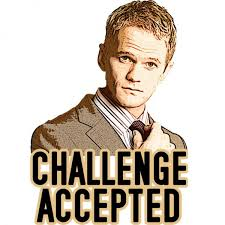

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Classes-and-instances" data-toc-modified-id="Classes-and-instances-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Classes and instances</a></span><ul class="toc-item"><li><span><a href="#Instance-attributes" data-toc-modified-id="Instance-attributes-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Instance attributes</a></span></li><li><span><a href="#Instance-methods" data-toc-modified-id="Instance-methods-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Instance methods</a></span></li><li><span><a href="#Class-variables" data-toc-modified-id="Class-variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Class variables</a></span></li></ul></li><li><span><a href="#Advanced-methods-and-decorators" data-toc-modified-id="Advanced-methods-and-decorators-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><em>Advanced</em> methods and decorators</a></span><ul class="toc-item"><li><span><a href="#@classmethod" data-toc-modified-id="@classmethod-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>@classmethod</a></span></li><li><span><a href="#@staticmethod" data-toc-modified-id="@staticmethod-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>@staticmethod</a></span></li><li><span><a href="#@property" data-toc-modified-id="@property-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>@property</a></span></li></ul></li><li><span><a href="#Inheritance" data-toc-modified-id="Inheritance-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Inheritance</a></span><ul class="toc-item"><li><span><a href="#super()" data-toc-modified-id="super()-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>super()</a></span></li><li><span><a href="#Special-Magic/Dunder-methods-(Advanced-but-fun-:-)-)" data-toc-modified-id="Special-Magic/Dunder-methods-(Advanced-but-fun-:-)-)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Special Magic/Dunder methods (<em>Advanced</em> but fun : ) )</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Further materials</a></span></li></ul></div>

## Introduction

Object oriented programming is the practice of writing programs that are centered around objects, which are defined via the `class` keyword. These objects contain methods and properties all bundled together. They allow us to group our data and functions in a way that is easy to reuse, and logically organized. 

We have already seen some of these when whe solved the [riddle in week 01](https://github.com/sheriffff/teaching-ironhack-data-madrid-2020/blob/main/week_01/11-map-reduce-filter.ipynb). With this kind of programming, it was relatively easy to follow the logic of the solution by just reading the code:



In [1]:
### CREATE THE CLASSES ####

import random
class Warden:
    '''
    Class to initialize a Warden object. A Warden is characterised by having:
    * A list of prisioners -> list_of_prisioners
    * A list of the prisioners that have already entered the room -> track_of_prisioners
    * The possibility to select one prisioner at random -> chose_one_prisioner()
    '''
    
    def __init__(self, list_of_prisioners):
        self.list_of_prisioners = list_of_prisioners
        self.track_of_prisioners = []
        
    def chose_one_prisioner(self):
        '''
        Method to select one prisioner at random.
        input: self
        returns: prisioner
        '''
        selected = random.choice(self.list_of_prisioners)
        if selected not in self.track_of_prisioners:
            self.track_of_prisioners.append(selected)
        return selected
    
#######################    
class StandardPrisioner:
    '''
    Class to initialize a StandardPrisioner object. A StandardPriosioner is characterised by:
    * keeping track of having turned the light on or not -> has_turned_ligt_on
    * have the ability to turn the light on -> action_on_light() 
    * answer the warden
    '''
    def __init__(self, has_turned_ligt_on=False):
        self.has_turned_ligt_on = has_turned_ligt_on
    
    def action_on_light(self, switch_state):
        '''
        Method to turn the light on
        inputs: self, switch_state (str: 'on'/'off') 
        '''
        if switch_state== 'on':
            return switch_state
        elif self.has_turned_ligt_on==False:
            self.has_turned_ligt_on = True # turn the ligh on
            return 'on'
        else:
            return switch_state
        
    def answers_to_warden(self):
        '''
        Method to answer the Warden question
        '''
        return False
        
########################        
class CaptainPrisioner:
    '''
    Class to initialize a CaptainPrisioner object. A CaptainPrisioner is characterised by:
    * keeping count of the times he/she has turned the light off -> count
    * have the ability to turn the light off -> action_on_light() 
    * answer the warden

    '''
    def __init__(self, count=1, num_of_prisioners=100):
        self.count = count
        self.num_of_prisioners = num_of_prisioners
        
    def action_on_light(self, switch_state):
        if switch_state=='on':
            self.count += 1
        return 'off'
    
    def answers_to_warden(self):
        return True if (self.count == self.num_of_prisioners) else False

**Logic of the game:**

In [2]:
num_of_prisioners = int(input())

100


In [3]:
list_of_prisioners = [StandardPrisioner() for _ in range(num_of_prisioners - 1)]
list_of_prisioners.append(CaptainPrisioner(num_of_prisioners=num_of_prisioners)) 

warden = Warden(list_of_prisioners)
switch_state = 'off'

nobody_answers = True
rounds = 1

while nobody_answers: 
    selected_prisioner = warden.chose_one_prisioner()
    switch_state = selected_prisioner.action_on_light(switch_state)

    if selected_prisioner.answers_to_warden() and (len(warden.track_of_prisioners) != num_of_prisioners):
        print('Game over you failed!!')
        nobody_answers = False
    elif selected_prisioner.answers_to_warden() and (len(warden.track_of_prisioners) == num_of_prisioners):
        print('Congratulations!! You freed all the prisioners!!')
        print(f'rounds needed: {rounds}')
        nobody_answers = False
    else:
        rounds += 1
        pass

Congratulations!! You freed all the prisioners!!
rounds needed: 11604


## Classes and instances

Imagine you create a sofwtare to manage a school, and you want to represent the "teachers" in you Python code. The teachers will have some associated data to them (`attributes` in the `class` jargon), and will be able to *perform actions* through functions that we will call `methods` (again, `class` jargon).

We could do that one at a time:

In [4]:
# Manual creation of teachers: 


teacher_alice ={'name': 'Alice',
               'surname': 'Albot',
               'email': 'alice.albot@school.com',
               'holidays_left': 30,
               'introduce_her_self': lambda : print('Hi, I am Alice Albot')}

# teacher_bob... thanks but no thanks...

In [5]:
teacher_alice['name']

'Alice'


The `class` keyword allows as to create a *blueprint* of any *teacher*. Each teacher we create using that *blueprint* is called an `instance` of the `class`.

In [6]:
# Class
class Teacher:
    pass

In [7]:
# Instances
alice = Teacher()
bob = Teacher()

In [8]:
isinstance(alice, Teacher)

True

In [9]:
alice

### Instance attributes

They contain data that is unique to each instance.

In [10]:
# Manually assign the attributes

# Alice
alice.name = 'Alice'
alice.surname = 'Albot'

# Bob
bob.name = 'Bob'
bob.surrname = 'Belfast'

In [11]:
bob.surrname

'Belfast'

In [12]:
alice.surname

'Albot'

Rather than doing it one by one, we can create these variables whenever an object instance is created with the special method `__init__`.  This function defines all the actions that need to be performed when we create a new object. The reason we have two underscores before and after the function name is to indicate that this function is internal to the object and should not be called from outside the object.

The method `__init__` receives the instance as it first argument --- `alice` in the example above. By convention, we call that argument `self`, but it could be anything. 

In [13]:
class Teacher:
    def __init__(self, name, surname, holidays_left):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        

In [14]:
bob = Teacher('Bob', 'Belfast', 30) # -> this runs __init__ automatically

In [15]:
fernando = Teacher('Fernando', 'Costa', 40)

In [16]:
print(f'Hi, I am {bob.name} {bob.surname}.')

Hi, I am Bob Belfast.


### Instance methods

Functions within our classes that will save us a lot of time

In [17]:
# Create a function that introduces a teacher:
def introduce_yourself(name, surname):
    print(f'Hi, I am {name} {surname}.')

In [18]:
introduce_yourself(bob.name, bob.surname)

Hi, I am Bob Belfast.


In [19]:
# Include this functionality in the class blueprint
class Teacher:
    working_hours = 8
    def __init__(self, name, surname, holidays_left):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        
    def introduce_yourself(self):
        print(f'Hi, I am {self.name} {self.surname}.')

In [20]:
# use the method from an instance
alice = Teacher('Alice', 'Albot', 30)
bob = Teacher('Bob', 'Belfast', 30)


bob.introduce_yourself()

Hi, I am Bob Belfast.


In [21]:
# use the method directly from the class (as if it was just a function)

Teacher.introduce_yourself(alice)

Hi, I am Alice Albot.


### Class variables

Instance variables are unique to each instance. Class variables, on the other hand, are common to all instances in a class.

In [22]:
# Set year number of holidays to 30

In [23]:
# Include this functionality in the class blueprint
class Teacher:
    number_holidays = 40 # This is by law, not depending on a particular Teacher
    def __init__(self, name, surname, holidays_left=30):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        
    def introduce_yourself(self):
        print(f'Hi, I am {self.name} {self.surname}.')
        
        


In [24]:
# we do not need to give the info number_holidays to each object
# they read it from the class variable
alice = Teacher('Alice', 'Albot')
alice.number_holidays

40

In [25]:
bob = Teacher('Bob', 'Belfast')
bob.number_holidays

40

If we want, we can modify a class variable to have anothe value in a particular object

In [26]:
alice.number_holidays = 50

In [27]:
alice.number_holidays

50

Notice that under the hood Python is creating a new attribute for alice, that overrides the class variable

In [28]:
alice.__dict__

{'name': 'Alice',
 'surname': 'Albot',
 'holidays_left': 30,
 'email': 'alice.albot@school.com',
 'number_holidays': 50}

Bob, however, does not have this attribute (the class has it)

In [29]:
bob.__dict__

{'name': 'Bob',
 'surname': 'Belfast',
 'holidays_left': 30,
 'email': 'bob.belfast@school.com'}

 The number of new vacation days will always apply to all Teachers, but it might change from year to year... We rather keep it in a place where it is easy to change for all teachers. However, each one (alice, bob,...) might pick up different days, and reduce their holidays left:

In [30]:
# Include this functionality in the class blueprint
class Teacher:
    number_holidays = 40 # This is by law, not depending on a particular Teacher
    def __init__(self, name, surname, holidays_left=30):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        
    def introduce_yourself(self):
        print(f'Hi, I am {self.name} {self.surname}.')
    
    def pick_up_holidays(self, num_of_days=1):
        self.holidays_left -= num_of_days
        

In [31]:
alice = Teacher('Alice', 'Albot')


In [32]:
alice.holidays_left

30

In [33]:
alice.pick_up_holidays(5)

In [34]:
alice.holidays_left

25

In [35]:
# Alice holidays do not affect Bob´s
bob = Teacher('Bob', 'Belfast')
bob.holidays_left

30

We can also call a method from the class itself (not so common)

In [36]:
Teacher.pick_up_holidays(bob, 7)

In [37]:
bob.holidays_left

23

**Exercise**

Create a class `Circle` with:
* radius as instance variable
* pi (math.pi) as class variable
* a method calculate_area(self) that returns the area of the object "circle"

In [38]:
import math

class Circle:
    pi = math.pi
    def __init__(self, radius):
        self.radius = radius
        
    def calculate_area(self):
        return self.pi * (self.radius ** 2)

In [39]:
my_circle = Circle(1)

In [40]:
my_circle.radius

1

In [41]:
my_circle.calculate_area()

3.141592653589793

## *Advanced* methods and decorators

### @classmethod 
Class methods take the class as their first argument


In [42]:
class Teacher:
    
    number_holidays = 30  
    
    def __init__(self, name, surname, holidays_left=20):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        
    
    def introduce_yourself(self):
        print(f'Hi, I am {self.name} {self.surname}.')
    
    # this method will affect the entire class. The keyword 'self'
    # is substituted by 'cls' (convention) to make this clear
    @classmethod
    def set_days_of_holidays(cls, num_of_days):
        cls.number_holidays = num_of_days
    
    

In [43]:
alice = Teacher('Alice', 'Albot')
bob = Teacher('Bob', 'Belfast')

In [44]:
alice.number_holidays

30

In [45]:
bob.number_holidays

30

In [46]:
alice.number_holidays

30

In [47]:
Teacher.set_days_of_holidays(60)
# Note: equivalent to "Teacher.number_holidays = 60" in this case

In [48]:
alice.number_holidays # yuju!

60

In [49]:
bob.number_holidays # yuju!

60

**My mistake!** I told in class that alice could not change the class variable. 
Sorry, I was wrong, she can! That is because the method is wrapped with the @classmethod 

(There is a link to a post on this methods at the end of the notebook if you wanna know more)

In [50]:
# Teacher.set_days_of_holidays(55)
alice.set_days_of_holidays(56)

In [51]:
alice.number_holidays

56

In [52]:
bob.number_holidays

56

### @staticmethod

This do not include neither the instance `self` of the class `cls` as arguments. They are just regular functions somehow connected to the concepts in the class

In [53]:
# @staticmethod to say 'Hi!'

In [54]:
# @staticmethod to say 'Hi!'
class Teacher:
    
    number_holidays = 30  
    
    def __init__(self, name, surname, holidays_left=30):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        
    
    def introduce_yourself(self):
        print(f'Hi, I am {self.name} {self.surname}.')
    
    @staticmethod
    def say_hi():
        # notice that we do not include self or cls
        print('hi!')
    
    def pick_up_holidays(self, num_of_days=1):
        self.holidays_left -= num_of_days
    
    @classmethod
    def set_days_of_holidays(cls, num_of_days):
        cls.number_holidays = num_of_days

In [55]:
alice = Teacher('Alice', 'Albot')
alice.say_hi()

hi!


### @property

If you want to access a method as if it is an attribute

In [56]:
# decorate  introduce_herself as @property
class Teacher:
    
    number_holidays = 30  
    
    def __init__(self, name, surname, holidays_left=30):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        
    @property
    def introduce_yourself(self):
        print(f'Hi, I am {self.name} {self.surname}.')
    
    @staticmethod
    def say_hi():
        # notice that we do not include self or cls
        print('hi!')
    
    def pick_up_holidays(self, num_of_days=1):
        self.holidays_left -= num_of_days
    
    @classmethod
    def set_days_of_holidays(cls, num_of_days):
        cls.number_holidays = num_of_days

In [57]:
alice = Teacher('Alice', 'Albot')
alice.introduce_yourself # notice that we do not need parenthesis (becuase is @property)

Hi, I am Alice Albot.


## Inheritance

We can use class inheritance when we would like to create a new class that will take on the attributes of another class. The new child class inherits all the attribure and methods of the parent class. However, we can override the methods of the parent class in the child class.

In [58]:
# Create a different types of teachers 
class Teacher:
    number_holidays = 30  
    
    def __init__(self, name, surname, holidays_left):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        
    def introduce_yourself(self):
        print(f'Hi, I am {self.name} {self.surname}.')
    
    def pick_up_holidays(self, num_of_days=1):
        self.holidays_left -= num_of_days

In [59]:
class Tutor(Teacher):
    pass

The subclass `Tutor` inherits everything from the *parent* class `Teacher`

In [60]:
bob = Tutor(name='Bob', surname='Belfast', holidays_left=28)

In [61]:
bob.introduce_yourself()

Hi, I am Bob Belfast.


In [62]:
bob.holidays_left

28

In [63]:
bob.pick_up_holidays(3)

In [64]:
bob.holidays_left

25

In [65]:
issubclass(Tutor, Teacher)

True

In [66]:
alice = Teacher('Alice', 'Albot', 30)
charles = Tutor('Charles', 'Carrot', 30)

In [67]:
# What would be printed with each of these statements?

# isinstance(charles, Teacher)
# isinstance(charles, Tutor)

# isinstance(alice, Teacher)
# isinstance(alice, Tutor)

###  super()

Tutors need another attribute when they are initialized: the group they tutor.

Of course, they also need all the data from regular Teachers.

`super` allows us to keep our code DRY

In [68]:
# Create a "special type" of teachers that inherits from Teacher        
class Tutor(Teacher):
    number_holidays = 40
    
    def __init__(self, name, surname, holidays_left, group):
        super().__init__(name, surname, holidays_left) # --> take these from the parent class
        self.group = group                             # --> this is unique to the Tutor class
    
    def introduce_yourself(self):                      #--> this method overrides the one in the Teacher class
        print(f'Hi, I am {self.name} {self.surname}. I am the tutor of {self.group}')

In [69]:
alice = Teacher(name='Alice', surname='Albot', holidays_left=30)
charles = Tutor(name='Charles', surname='Carrot', holidays_left=30, group='1ºB')

In [70]:
# alice.group # ERROR!

In [71]:
charles.group

'1ºB'

In [72]:
alice.introduce_yourself() # standard Teacher behaviour

Hi, I am Alice Albot.


In [73]:
charles.introduce_yourself() # special Tutor behaviour

Hi, I am Charles Carrot. I am the tutor of 1ºB


In [74]:
# If not overriden, methods and attributes are the same for parent and child
print('Alice')
print(alice.holidays_left)
alice.pick_up_holidays(3)
print(alice.holidays_left)

print('\nBob:')
print(bob.holidays_left)
bob.pick_up_holidays(3)
print(bob.holidays_left)

Alice
30
27

Bob:
25
22


In [75]:
# Use this functions to know the relationship between objects and classes
# isinstance, issubclass

In [76]:
# Methods resolution (similar to scope)
print(help(Teacher))

Help on class Teacher in module __main__:

class Teacher(builtins.object)
 |  Teacher(name, surname, holidays_left)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, surname, holidays_left)
 |      Initialize class attributes
 |  
 |  introduce_yourself(self)
 |  
 |  pick_up_holidays(self, num_of_days=1)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  number_holidays = 30

None


### Special Magic/Dunder methods (*Advanced* but fun : ) )

We can override built-in behaviours, or [emulate numeric behaviour with our objects](https://docs.python.org/2.0/ref/numeric-types.html)

dunder == double underscore


In [77]:
# Create a different types of teachers 
class Teacher:
    number_holidays = 30  
    
    def __init__(self, name, surname, holidays_left):
        '''
        Initialize class attributes
        '''
        self.name = name
        self.surname = surname
        self.holidays_left = holidays_left
        self.email = self.name.lower() + '.' + self.surname.lower() + '@school.com'
        
    def introduce_yourself(self):
        print(f'Hi, I am {self.name} {self.surname}.')
    
    def pick_up_holidays(self, num_of_days=1):
        self.holidays_left -= num_of_days
        
    def __str__(self):
        return f'I am {self.name}'
    
    def __mul__(self, other):
        return f'{self.name} and {other.name} had kids!'

    
# Create a "special type" of teachers that inherits from Teacher        
class Tutor(Teacher):
    number_holidays = 40
    
    def __init__(self, name, surname, holidays_left, group):
        super().__init__(name, surname, holidays_left) # --> take these from the parent class
        self.group = group                             # --> this is unique to the Tutor class
    
    def introduce_yourself(self):                      #--> this method overrides the one in the Teacher class
        print(f'Hi, I am {self.name} {self.surname}. I am the tutor of {self.group}')

In [78]:
alice = Teacher(name='Alice', surname='Albot', holidays_left=27)
bob = Tutor(name='Bob', surname='Belfast', holidays_left=28, group='1ºA')

In [79]:
print(alice)
print(bob)
alice * bob

I am Alice
I am Bob


'Alice and Bob had kids!'

## Summary 

**Topics**
* We are going to use objects a lot!!! (pandas, sklearn,...). But not necessarily going to write them ;)
* Inheritance is key to reuse code
* Aethods are functions defined within classes
* Attributes are varaibles defined within classes


**Students feedback**

* Classes help us to reuse and organize code


## Further materials

* [Highly recommended!] A terrific Youtube tutorial by [Corey Schafer](https://www.youtube.com/watch?v=ZDa-Z5JzLYM). This lesson is highly inspired in his tutorials.
* Nice post on [class and static methods](https://realpython.com/instance-class-and-static-methods-demystified/)